# Student grades prediction - Sudhanshu Kumar Singh -DS2306 Date -10-10-2023

In [ ]:
# Import required library 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
# Load the dataset
data=pd.read_csv("D:\sks\Flip_Robo_techonology _project\Project_discussion\Third_Phase_Project\Grades.csv")

In [38]:
data.sample()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
218,CS-97219,B-,B-,A-,A-,B,A-,A-,A-,B+,...,C,B-,A-,C-,C+,A-,B-,C+,A-,2.942


In [39]:
# finding data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [40]:
# Convert grades to numerical values
# Example: Replace course grades with numerical values
grade_mapping = {
    'A+': 4.0, 'A': 4.0, 'A-': 3.7,
    'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7,
    'D+': 1.3, 'D': 1.0, 'F': 0.0
}

data = data.replace(grade_mapping)

In [41]:
data.head(5)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,CS-97002,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,CS-97003,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,CS-97004,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,CS-97005,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [42]:
#Checking for null value in data 
data.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [43]:
# Removed null value by fill with most frequest value (mode). ANd used fillna 
for col in data.columns:
    most_frequent_value = data[col].mode()[0]
    data[col].fillna(most_frequent_value, inplace=True)

# Check if null values are filled
print(data.isnull().sum())

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64


In [44]:
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,CS-97002,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,CS-97003,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,CS-97004,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,CS-97005,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
coltest_to_convert=['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA']

In [47]:
label_encoder = LabelEncoder()
for col in coltest_to_convert:
    data[col] = label_encoder.fit_transform(data[col].astype(str))
    print(data.dtypes)

Seat No.       int32
PH-121        object
HS-101       float64
CY-105        object
HS-105/12     object
MT-111        object
CS-105       float64
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331       float64
EF-303        object
HS-304        object
CS-301       float64
CS-302       float64
TC-383       float64
MT-442       float64
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317       float64
CS-403       float64
CS-421        object
CS-406        object
CS-414        object
CS-419       float64
CS-423       float64
CS-412        object
CGPA         float64
dtype: object
Seat No.       int32
PH-121         int32
HS-101       float64
CY-105        object

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Seat No.   571 non-null    int32
 1   PH-121     571 non-null    int32
 2   HS-101     571 non-null    int32
 3   CY-105     571 non-null    int32
 4   HS-105/12  571 non-null    int32
 5   MT-111     571 non-null    int32
 6   CS-105     571 non-null    int32
 7   CS-106     571 non-null    int32
 8   EL-102     571 non-null    int32
 9   EE-119     571 non-null    int32
 10  ME-107     571 non-null    int32
 11  CS-107     571 non-null    int32
 12  HS-205/20  571 non-null    int32
 13  MT-222     571 non-null    int32
 14  EE-222     571 non-null    int32
 15  MT-224     571 non-null    int32
 16  CS-210     571 non-null    int32
 17  CS-211     571 non-null    int32
 18  CS-203     571 non-null    int32
 19  CS-214     571 non-null    int32
 20  EE-217     571 non-null    int32
 21  CS-212     571 n

In [49]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Seat No.,571.0,285.000000,164.977776,0.0,142.5,285.0,427.5,570.0
PH-121,571.0,7.031524,2.871955,0.0,5.0,8.0,9.0,11.0
HS-101,571.0,5.802102,2.712103,0.0,4.0,6.0,8.0,10.0
CY-105,571.0,7.821366,2.690392,0.0,7.0,9.0,10.0,11.0
HS-105/12,571.0,6.630473,3.009642,0.0,4.0,7.0,9.0,11.0
MT-111,571.0,7.003503,2.749798,0.0,5.0,8.0,9.0,11.0
CS-105,571.0,6.919440,2.422951,0.0,6.0,8.0,9.0,9.0
CS-106,571.0,6.879159,2.508464,0.0,6.0,7.0,9.0,11.0
EL-102,571.0,6.945709,2.843681,0.0,5.0,8.0,9.0,11.0
EE-119,571.0,6.033275,2.447472,0.0,4.0,7.0,8.0,10.0


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

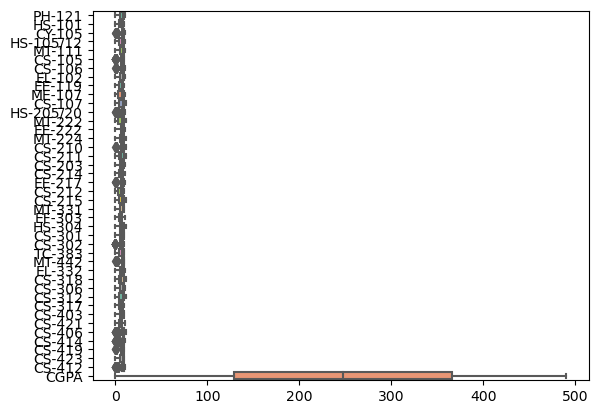

In [70]:
#Finding the outliers
sns.boxplot(data=data, orient="h", palette="Set2", dodge=False)

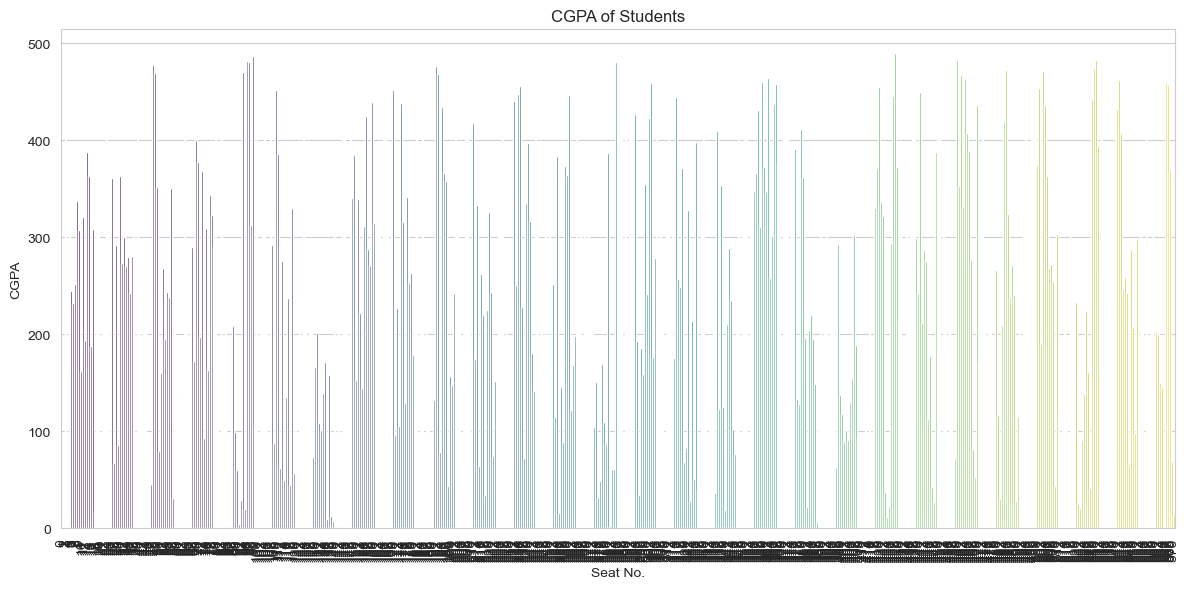

In [80]:
# Set the style of seaborn
sns.set_style('whitegrid')

# Visualize a bar plot for CGPA
plt.figure(figsize=(12, 6))
sns.barplot(x=data.index, y='CGPA', data=data, palette='viridis')
plt.xlabel('Seat No.')
plt.ylabel('CGPA')
plt.title('CGPA of Students')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['CGPA'])
y = data['CGPA']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
data.dropna(inplace=True)  # Example: Remove rows with missing values


In [ ]:
data.shape

In [ ]:
X = data.drop(columns=['CGPA'])  # Features: Course grades
y = data['CGPA']  # Target variable: CGPA

In [ ]:
#spliting the data for training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
#Train a regression model to predict CGPA using simple regression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = model.predict(X_test)


In [74]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 508.2149795328638
R-squared (R2) Score: 0.972749424448465


# Support Vector Classifier (SVC)

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [76]:
# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [77]:
# Predict on the test set
y_pred = svm_model.predict(X_test)

In [78]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.017391304347826087


In [79]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         0
          60       0.00      0.00      0.00         1
          67       0.00      0.00      0.00         1
          68       0.00      0.00      0.00         0
          70       0.00      0.00      0.00         1
          73       0.00      0.00      0.00         1
          85       0.00      0.00      0.00         1
          86       0.00      0.00      0.00         1
          88       0.00      0.00      0.00         1
          89       0.00      0.00      0.00         1
          93       0.00      0.00      0.00         1
   

C:\Users\Sudhanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sudhanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sudhanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sudhanshu\anaconda3\lib\site-packages\skle